# xgboost airline example

In [13]:
import pandas as pd
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [14]:
df = pd.read_csv('https://s3.amazonaws.com/h2o-airlines-unpacked/allyears2k.csv',encoding='iso8859_15')
df = df.dropna(axis=1)
X = df.drop('IsDepDelayed',axis=1)
y = df['IsDepDelayed']

/opt/conda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df.dtypes

Year              int64
Month             int64
DayofMonth        int64
DayOfWeek         int64
CRSDepTime        int64
CRSArrTime        int64
UniqueCarrier    object
FlightNum         int64
Origin           object
Dest             object
Cancelled         int64
Diverted          int64
IsArrDelayed     object
IsDepDelayed     object
dtype: object

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = columns
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output
    
    def inverse_transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.inverse_transform(data[column])

        return output
    

encoder = EncodeCategorical(['UniqueCarrier','Origin','Dest','IsArrDelayed'])
y_encoder = EncodeCategorical(['IsDepDelayed'])

In [17]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline


cols = ['Year', 'Month', 'DayofMonth','DayOfWeek', 'CRSDepTime', 'UniqueCarrier', 'Origin', 'Dest','IsDepDelayed']
df = df[cols]
xgb = XGBClassifier()
pipeline = Pipeline([
    ("label_encoder", encoder),
    ('Classifier',xgb)
])


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('label_encoder', EncodeCategorical(columns=['UniqueCarrier', 'Origin', 'Dest', 'IsArrDelayed'])), ('Classifier', XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))])

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
predictions = pipeline.predict(X_test)

le = LabelEncoder()
le.fit(y_test)
print('accurancy: %f '% accuracy_score(le.transform(y_test), le.transform(predictions)))
print('auc: %f' % roc_auc_score(le.transform(y_test), le.transform(predictions)))


accurancy: 0.744202 
auc: 0.742402


In [21]:
print(xgb.feature_importances_)


[ 0.19642857  0.          0.08116883  0.04220779  0.08928572  0.09740259
  0.10714286  0.0762987   0.13311689  0.04707792  0.06493507  0.
  0.06493507]


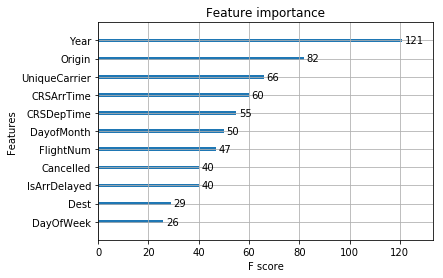

In [22]:
from xgboost import plot_importance
%matplotlib inline
plot_importance(xgb)

In [23]:
X

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,Dest,Cancelled,Diverted,IsArrDelayed
0,1987,10,14,3,730,849,PS,1451,SAN,SFO,0,0,YES
1,1987,10,15,4,730,849,PS,1451,SAN,SFO,0,0,YES
2,1987,10,17,6,730,849,PS,1451,SAN,SFO,0,0,YES
3,1987,10,18,7,730,849,PS,1451,SAN,SFO,0,0,NO
4,1987,10,19,1,730,849,PS,1451,SAN,SFO,0,0,YES
5,1987,10,21,3,730,849,PS,1451,SAN,SFO,0,0,NO
6,1987,10,22,4,730,849,PS,1451,SAN,SFO,0,0,YES
7,1987,10,23,5,730,849,PS,1451,SAN,SFO,0,0,YES
8,1987,10,24,6,730,849,PS,1451,SAN,SFO,0,0,YES
9,1987,10,25,7,730,849,PS,1451,SAN,SFO,0,0,YES
